In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec

### import data

In [3]:
deaths_world=2626
recovered_world=25227
total_world=78879

max_death_rate=round(deaths_world/(deaths_world+recovered_world)*100,1)
min_death_rate=round(deaths_world/total_world*100,1)

print('between',min_death_rate,'% and',max_death_rate,'%')

between 3.3 % and 9.4 %


In [6]:
#lista=np.array([['21/01/2020',0,0],['31/01/2020',2,0],['07/02/2020',3,0],['22/02/2020',9,0],['23/02/2020',76,2],['24/02/2020',124,2],['25/02/2020',288,7]])
lista=np.array([['21/02/2020',3,0],['22/02/2020',9,0],['23/02/2020',76,2],['24/02/2020',124,2],['25/02/2020',229,6],['26/02/2020',322,11],['27/02/2020',400,12],['28/02/2020',650,17]])

df=pd.DataFrame(lista,index=lista[:,0],columns=['Data','Contaminated','Deaths'])
df.drop('Data',axis=1,inplace=True)

df['Contaminated']=pd.to_numeric(df['Contaminated'])
df['Deaths']=pd.to_numeric(df['Deaths'])
df.index=pd.to_datetime(df.index,format='%d/%m/%Y')

data=df.index

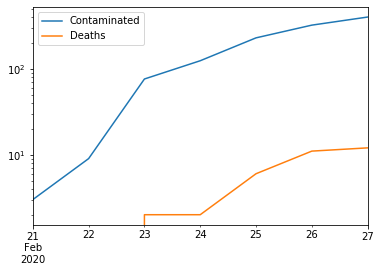

In [7]:
df.plot()
plt.legend()
plt.yscale('log')
plt.show()

### statistical analysis

[0, 3.0, 8.444444444444445, 1.631578947368421, 1.846774193548387, 1.4061135371179039, 1.2422360248447204]


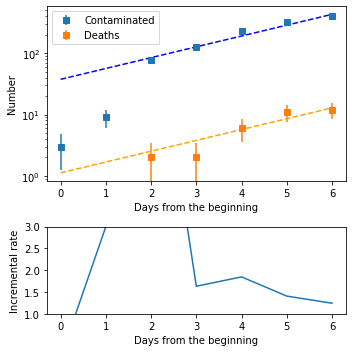

In [8]:
from scipy.optimize import curve_fit

def func(t,t0,a):
    #return (a-b*t)**(t-t0)
    return a**(t-t0)

tdelta=df.index-pd.to_datetime('2020-02-21')

xdata=tdelta.days
ydata=df['Contaminated']

incremento=[0]
for i in range(len(ydata)-1):
    incremento.append(ydata[i+1]/ydata[i])
 
print(incremento)

ydata_death=df['Deaths']

popt, pcov = curve_fit(func, xdata, ydata,p0=[0,2])

def func_death(t,mort_rate):
    return mort_rate*popt[1]**(t-popt[0])

popt_death, pcov_death = curve_fit(func_death, xdata, ydata_death)

plt.figure(figsize=(5,5))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
plt.subplot(gs[0])
plt.plot(xdata, func(xdata, *popt), 'b--')
plt.plot(xdata, func_death(xdata, *popt_death), color='orange',linestyle='--')
plt.errorbar(xdata,ydata,np.sqrt(ydata),linestyle='None',label='Contaminated',marker='s')
plt.errorbar(xdata,ydata_death,np.sqrt(ydata_death),linestyle='None',label='Deaths',marker='s')
plt.yscale('log')
plt.legend()
plt.xlabel('Days from the beginning')
plt.ylabel('Number')
plt.subplot(gs[1])
plt.plot(xdata,incremento)
plt.tight_layout()
plt.xlabel('Days from the beginning')
plt.ylabel('Incremental rate')
plt.ylim(1,3)
plt.tight_layout()
plt.savefig('coronavirus_plot.png',dpi=300)
plt.show()

In [9]:
print('the mortality rate is between '+str(round(popt_death[0]*100,1))+'% and ',max_death_rate,'%')

the mortality rate is between 3.0% and  9.4 %


In [10]:
print('the number of contaminated people increases everyday of a factor',round(popt[1],1))

the number of contaminated people increases everyday of a factor 1.5


In [11]:
print('Number of contaminated people ',int(func(4+14, *popt)))

print('Number of func_deaths ',int(func_death(4+14, *popt_death)))

Number of contaminated people  56395
Number of func_deaths  1684


### import epidemic data

In [12]:
df=pd.read_csv('epidemic_data.csv')

len_df=df.shape[0]
print(len_df)

# importo dati 0
import re
confirmed=pd.to_numeric(re.findall(r'\d+', df['ConfirmedCases'][0]))
deaths=pd.to_numeric(re.findall(r'\d+', df['Deaths'][0]))
recovered=pd.to_numeric(re.findall(r'\d+', df['RecoveredCases'][0]))

# loop sul dataframe
for i in range(len_df-1):
    confirmed=confirmed+pd.to_numeric(re.findall(r'\d+', df['ConfirmedCases'][i+1]))
    deaths=deaths+pd.to_numeric(re.findall(r'\d+', df['Deaths'][i+1]))
    recovered=recovered+pd.to_numeric(re.findall(r'\d+', df['RecoveredCases'][i+1]))

len(confirmed)

print(confirmed[0:len(confirmed)-20])

print(deaths[0:len(deaths)-20])

print(recovered[0:len(recovered)-20])

81
[  555   653   941  1434  2118  2927  5578  6166  8234  9927 12038 16787
 19881 23892 27636 30818 34392 37121 40151 42763 44803 45222 60370 66887
 69032 71226 73260 75138 75641 76199 76843 78599 78985 79570]
[  17   18   26   42   56   82  131  133  171  213  259  362  426  492
  564  634  719  806  906 1013 1113 1118 1371 1523 1666 1770 1868 2007
 2122 2247 2251 2458 2469 2629]
[   28    30    36    39    52    61   107   126   143   222   284   472
   623   852  1124  1487  2011  2616  3244  3946  4683  5150  6295  8058
  9395 10865 12583 14352 16121 18177 18890 22886 23394 25227]


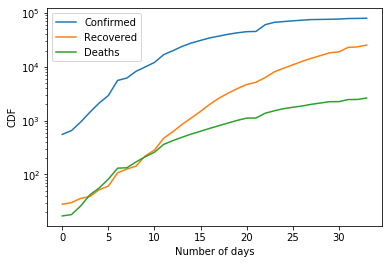

In [13]:
plt.plot(confirmed[0:len(confirmed)-20],label='Confirmed')
plt.plot(recovered[0:len(recovered)-20],label='Recovered')
plt.plot(deaths[0:len(deaths)-20],label='Deaths')
plt.yscale('log')
plt.legend()
plt.xlabel('Number of days')
plt.ylabel('CDF')
plt.show()

In [10]:
conf_world=confirmed[0:len(confirmed)-20]

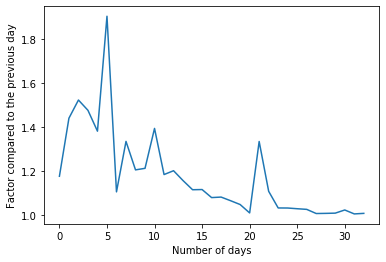

In [11]:
lista=[]

for i in range(len(conf_world)-1):
    lista.append(conf_world[i+1]/conf_world[i])
    
plt.plot(lista)
plt.xlabel('Number of days')
plt.ylabel('Factor compared to the previous day')
plt.show()

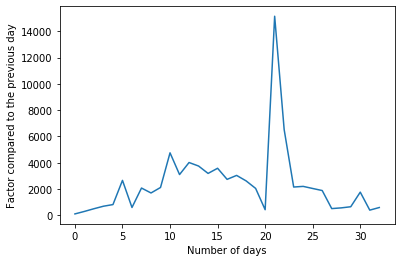

In [12]:
lista=[]

for i in range(len(conf_world)-1):
    lista.append(conf_world[i+1]-conf_world[i])
    
plt.plot(lista)
plt.xlabel('Number of days')
plt.ylabel('Factor compared to the previous day')
plt.show()

### patient data

In [13]:
xls = pd.ExcelFile('patient_data.xlsx')

In [14]:
xls.sheet_names

['outside_Hubei', 'Hubei']

In [15]:
df_patient0=pd.read_excel('patient_data.xlsx',sheet_name='outside_Hubei')

In [16]:
df_patient1=pd.read_excel('patient_data.xlsx',sheet_name='Hubei')

In [17]:
df_patient0.shape

(11628, 33)

In [18]:
df_patient=pd.concat([df_patient0,df_patient1],join='outer',sort=False)
df_patient.reset_index(inplace=True)
df_patient.drop(['index','ID'],axis=1)

,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,30,male,"Chaohu City, Hefei City",Anhui,China,1,31.6539,117.828749,admin,18.01.2020,...,NaN,NaN,NaN,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,NaN
1,47,male,"Baohe District, Hefei City",Anhui,China,1,31.8283,117.224844,point,10.01.2020,...,NaN,NaN,NaN,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,NaN
2,49,male,"High-Tech Zone (Gaoxin), Hefei City",Anhui,China,1,31.8283,117.224844,point,15.01.2020,...,NaN,NaN,NaN,High-Tech Zone (Gaoxin),Shushan District,Hefei City,Anhui,China,340104,NaN
3,47,female,"High-Tech Zone (Gaoxin), Hefei City",Anhui,China,1,31.8283,117.224844,point,17.01.2020,...,NaN,NaN,NaN,High-Tech Zone (Gaoxin),Shushan District,Hefei City,Anhui,China,340104,NaN
4,50,female,"Feidong County, Hefei City",Anhui,China,1,31.8283,117.224844,point,10.01.2020,...,NaN,NaN,NaN,#REF!,#REF!,#REF!,#REF!,#REF!,#REF!,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26352,NaN,NaN,Qianjiang,Hubei,China,1,30.4039,112.886318,admin,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26353,NaN,NaN,Qianjiang,Hubei,China,1,30.4039,112.886318,admin,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26354,NaN,NaN,Shennongjia Forest District,Hubei,China,1,31.5833,110.500000,admin,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26355,NaN,NaN,Shennongjia Forest District,Hubei,China,1,31.5833,110.500000,admin,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_patient_new=df_patient[['age','sex']]

df_patient_new['age']=pd.to_numeric(df_patient_new['age'],errors='coerce')

df_patient_new.dropna(inplace=True)

/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/andreapalladino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


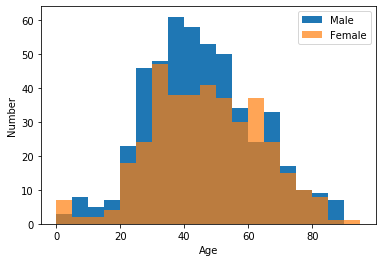

In [36]:
plt.hist(df_patient_new.age[df_patient_new.sex=='male'],bins=np.arange(0,100,5),label='Male')
plt.hist(df_patient_new.age[df_patient_new.sex=='female'],alpha=0.7,bins=np.arange(0,100,5),label='Female')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()